# Regresión Lineal para Predicción de Humedad (_humedad)
Este notebook implementa un modelo de regresión lineal para predecir la humedad, con todas las curvas y métricas.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
# Cargar el dataset
dataset = pd.read_csv('../dataset/ML1_temperature.xlsx - Hoja1.csv', decimal=',')
x = dataset.drop(['recnt_Humidity','recnt_Temperature'], axis=1).values
y = dataset['recnt_Humidity'].values.reshape(-1, 1)

In [58]:
# Separar en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Curva de aprendizaje
Muestra cómo varía el error (MSE) al predecir humedad según el tamaño del conjunto de entrenamiento.

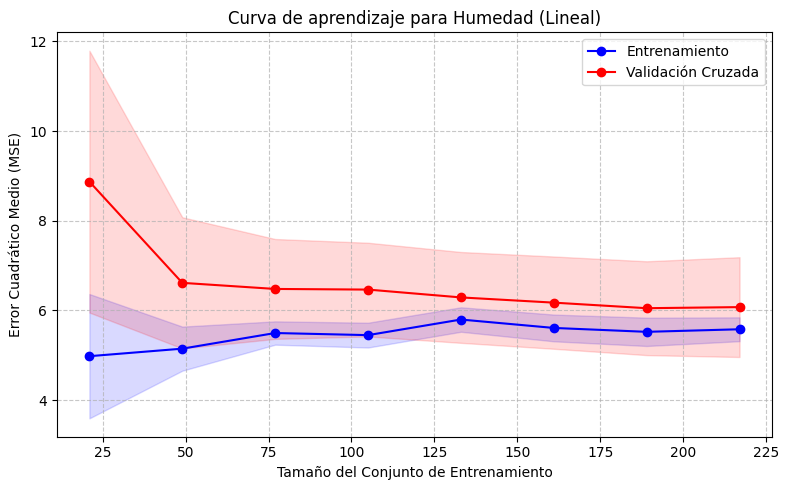

Comentario/análisis:
- MSE Final Entrenamiento: 5.5786
- MSE Final Validación: 6.0727
Diagnóstico: SUBAJUSTE


In [59]:
# Curva de aprendizaje para Humedad (Lineal)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), x_train, y_train.ravel(), cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 8), shuffle=True, random_state=42
)

train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = -val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validación Cruzada')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.15)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, color='red', alpha=0.15)
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curva de aprendizaje para Humedad (Lineal)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Análisis automático
print('Comentario/análisis:')
print(f'- MSE Final Entrenamiento: {train_scores_mean[-1]:.4f}')
print(f'- MSE Final Validación: {val_scores_mean[-1]:.4f}')
if train_scores_mean[-1] > 1 and val_scores_mean[-1] > 1:
    print('Diagnóstico: SUBAJUSTE')
elif abs(train_scores_mean[-1] - val_scores_mean[-1]) > 1:
    print('Diagnóstico: SOBREAJUSTE')
else:
    print('Diagnóstico: BUENO')

## Curva de validación
Muestra el desempeño del modelo para diferentes grados polinómicos (simulación de complejidad) al predecir humedad.

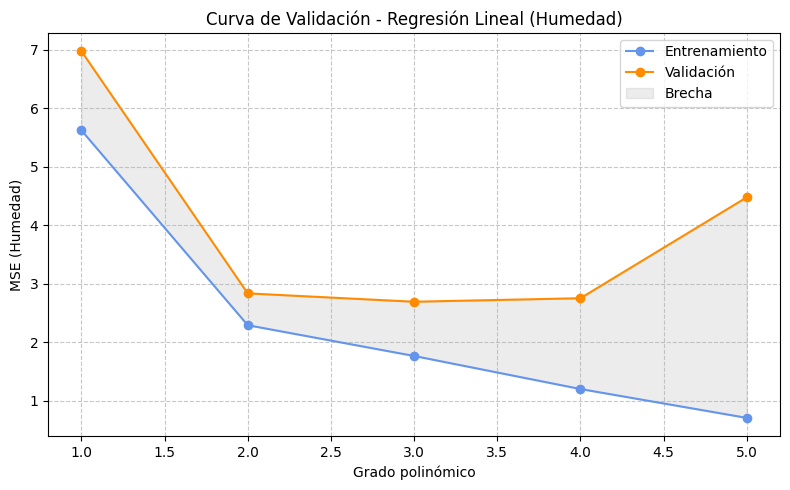

Mejor grado polinómico: 3


In [60]:
# Curva de validación del modelo lineal para humedad
from sklearn.preprocessing import PolynomialFeatures

degrees = np.arange(1, 6)
train_scores, val_scores = [], []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    x_train_poly = poly.fit_transform(x_train)
    x_val_poly = poly.transform(x_val)
    model = LinearRegression().fit(x_train_poly, y_train)
    train_scores.append(mean_squared_error(y_train, model.predict(x_train_poly)))
    val_scores.append(mean_squared_error(y_val, model.predict(x_val_poly)))

plt.figure(figsize=(8,5))
plt.plot(degrees, train_scores, marker='o', color='cornflowerblue', label='Entrenamiento')
plt.plot(degrees, val_scores, marker='o', color='darkorange', label='Validación')
plt.fill_between(degrees, train_scores, val_scores, color='gray', alpha=0.15, label='Brecha')
plt.xlabel('Grado polinómico')
plt.ylabel('MSE (Humedad)')
plt.title('Curva de Validación - Regresión Lineal (Humedad)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mejor configuración
mejor_indice = np.argmin(val_scores)
mejor_grado = degrees[mejor_indice]
print(f'Mejor grado polinómico: {mejor_grado}')

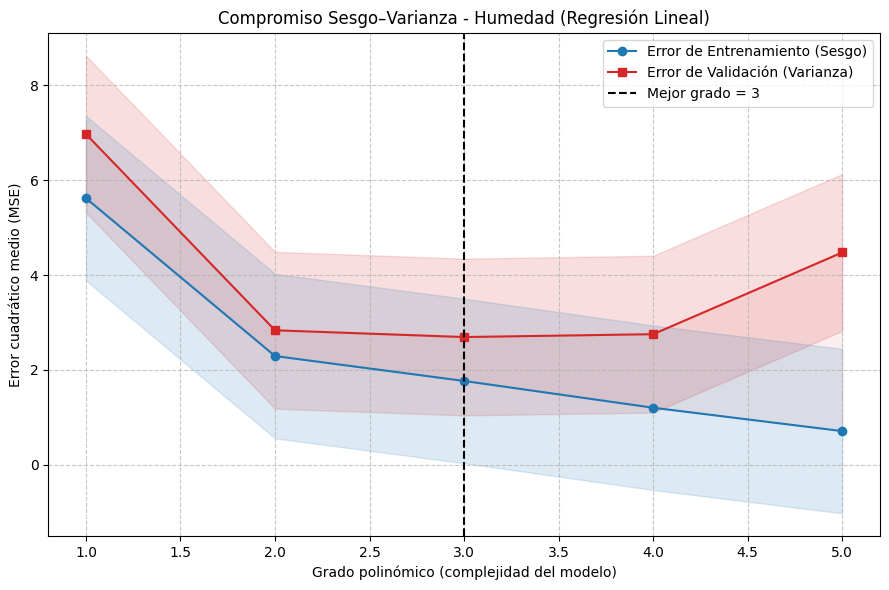

DIAGNÓSTICO
• Mejor grado polinómico: 3
• MSE validación mínimo: 2.6917
• MSE entrenamiento correspondiente: 1.7651

Diagnóstico del problema: SUBAJUSTE
El modelo es demasiado simple para los datos


In [66]:
# Curva de compromiso sesgo-varianza para HUMEDAD (estilo informe)
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)
plt.figure(figsize=(9,6))
plt.plot(degrees, train_scores, marker='o', color='#1f77b4', label='Error de Entrenamiento (Sesgo)')
plt.plot(degrees, val_scores, marker='s', color='#d62728', label='Error de Validación (Varianza)')
plt.fill_between(degrees, val_scores, train_scores, color='#d62728', alpha=0.08)
plt.fill_between(degrees, val_scores-np.std(val_scores), val_scores+np.std(val_scores), color='#d62728', alpha=0.15)
plt.fill_between(degrees, train_scores-np.std(train_scores), train_scores+np.std(train_scores), color='#1f77b4', alpha=0.15)
mejor_indice = np.argmin(val_scores)
mejor_grado = degrees[mejor_indice]
plt.axvline(mejor_grado, color='black', linestyle='--', label=f'Mejor grado = {mejor_grado}')
plt.xlabel('Grado polinómico (complejidad del modelo)')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Compromiso Sesgo–Varianza - Humedad (Regresión Lineal)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Informe y diagnóstico automático
mse_val_min = val_scores[mejor_indice]
mse_train_corresp = train_scores[mejor_indice]
print('DIAGNÓSTICO')
print(f'• Mejor grado polinómico: {mejor_grado}')
print(f'• MSE validación mínimo: {mse_val_min:.4f}')
print(f'• MSE entrenamiento correspondiente: {mse_train_corresp:.4f}')
if mse_train_corresp < mse_val_min - 1:
    print('\nDiagnóstico del problema: SOBREAJUSTE')
    print('El modelo se ajusta demasiado a los datos de entrenamiento')
elif mse_train_corresp > 1 and mse_val_min > 1:
    print('\nDiagnóstico del problema: SUBAJUSTE')
    print('El modelo es demasiado simple para los datos')
else:
    print('\nDiagnóstico del problema: BALANCE IDEAL')
    print('El modelo generaliza correctamente')

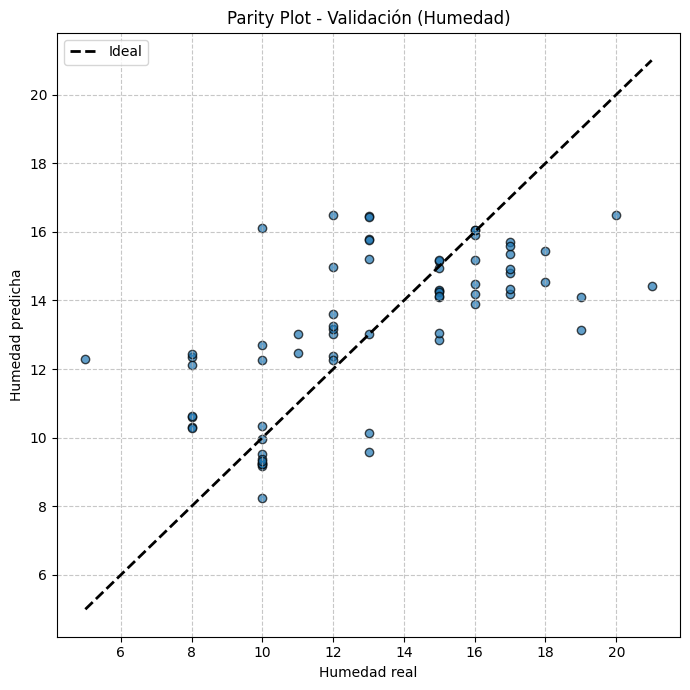

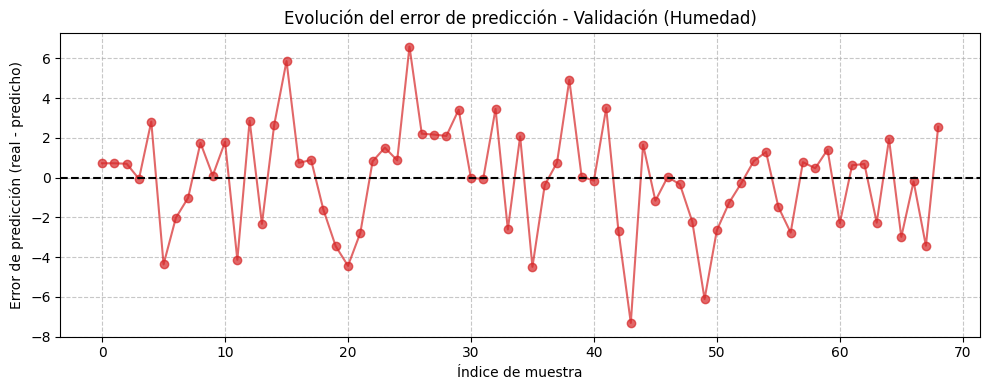

MSE validación: 6.9739
R2 validación: 0.4131


In [65]:
# Parity plot y evolución del error para HUMEDAD (estilo informe)
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(7,7))
plt.scatter(y_val, y_val_pred, color='#1f77b4', edgecolor='k', alpha=0.7)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Humedad real')
plt.ylabel('Humedad predicha')
plt.title('Parity Plot - Validación (Humedad)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evolución del error
error_val = y_val - y_val_pred
plt.figure(figsize=(10,4))
plt.plot(error_val, marker='o', linestyle='-', color='#d62728', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Error de predicción (real - predicho)')
plt.title('Evolución del error de predicción - Validación (Humedad)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Métricas
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'MSE validación: {mse:.4f}')
print(f'R2 validación: {r2:.4f}')

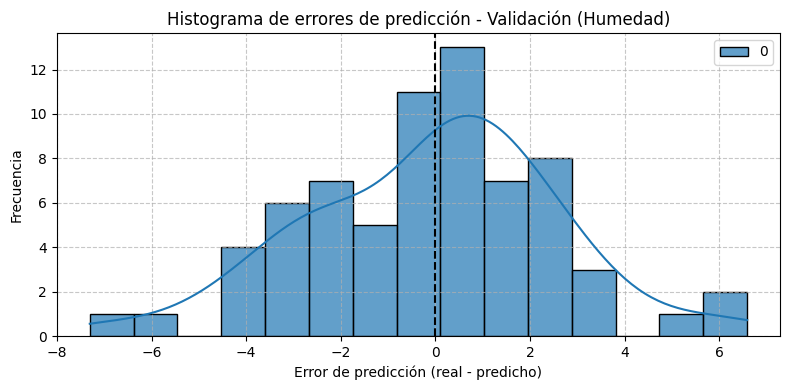

Métrica,Valor
MSE validación,6.9739
R2 validación,0.4131
Error medio,-0.0712
Desviación estándar del error,2.6399


In [63]:
# Histograma de errores y tabla resumen para HUMEDAD (estilo informe)
import seaborn as sns
from IPython.display import display, HTML

plt.figure(figsize=(8,4))
sns.histplot(error_val, bins=15, kde=True, color='#1f77b4', edgecolor='black', alpha=0.7)
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Error de predicción (real - predicho)')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores de predicción - Validación (Humedad)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas
summary_table = f'''
<table style="border-collapse:collapse; width:60%; font-size:1.1em;">
<tr style="background:#f2f2f2;"><th>Métrica</th><th>Valor</th></tr>
<tr><td style="padding:6px;">MSE validación</td><td style="padding:6px;">{mse:.4f}</td></tr>
<tr><td style="padding:6px;">R2 validación</td><td style="padding:6px;">{r2:.4f}</td></tr>
<tr><td style="padding:6px;">Error medio</td><td style="padding:6px;">{np.mean(error_val):.4f}</td></tr>
<tr><td style="padding:6px;">Desviación estándar del error</td><td style="padding:6px;">{np.std(error_val):.4f}</td></tr>
</table>'''
display(HTML(summary_table))

In [64]:
# Diagnóstico automático final para HUMEDAD (estilo informe)
print('DIAGNÓSTICO FINAL HUMEDAD')
if mse < 1 and r2 > 0.8:
    print('El modelo predice la humedad con alta precisión y generaliza bien.')
elif mse > 1 and r2 < 0.5:
    print('El modelo tiene problemas de subajuste: prueba aumentar el grado polinómico o usar otro modelo.')
elif mse < 1 and r2 < 0.5:
    print('El modelo tiene bajo error pero no explica bien la varianza: revisa la calidad de los datos.')
else:
    print('El modelo podría estar sobreajustando: revisa la diferencia entre error de entrenamiento y validación.')

DIAGNÓSTICO FINAL HUMEDAD
El modelo tiene problemas de subajuste: prueba aumentar el grado polinómico o usar otro modelo.


## Curva de paridad
Compara las predicciones de humedad con los valores reales.

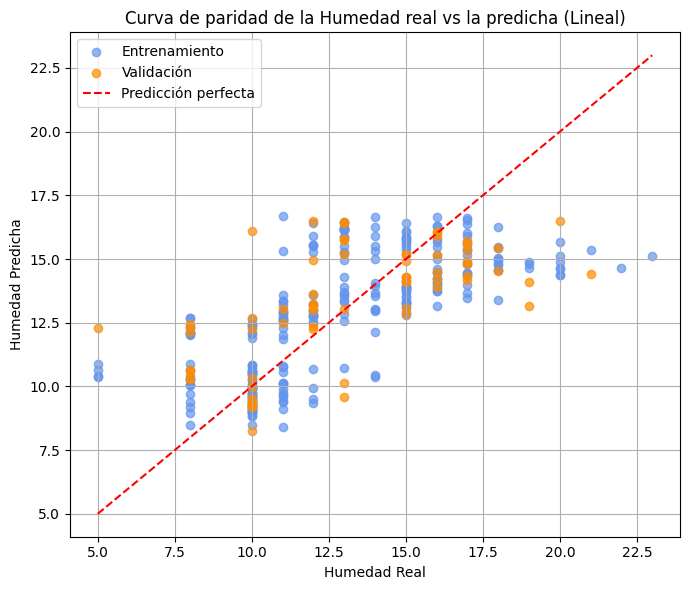

ENTRENANDO MODELO LINEAL PARA HUMEDAD
MSE Entrenamiento: 5.6209
MSE Validación: 6.9739
R² Entrenamiento: 0.4995
R² Validación: 0.4131


In [67]:
# Curva de paridad de la humedad real vs la predicha (Lineal)
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
plt.figure(figsize=(7,6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Entrenamiento', color='cornflowerblue')
plt.scatter(y_val, y_val_pred, alpha=0.7, label='Validación', color='darkorange')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Predicción perfecta')
plt.xlabel('Humedad Real')
plt.ylabel('Humedad Predicha')
plt.title('Curva de paridad de la Humedad real vs la predicha (Lineal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print('ENTRENANDO MODELO LINEAL PARA HUMEDAD')
print(f"MSE Entrenamiento: {mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE Validación: {mean_squared_error(y_val, y_val_pred):.4f}")
print(f"R² Entrenamiento: {r2_score(y_train, y_train_pred):.4f}")
print(f"R² Validación: {r2_score(y_val, y_val_pred):.4f}")

## Curva de sesgo y varianza
Analiza la diferencia entre el error de entrenamiento y validación al predecir humedad.

In [50]:
y_train_pred = model.predict(x_train)
print(f'MSE Entrenamiento (Humedad): {mean_squared_error(y_train, y_train_pred):.3f}')
print(f'MSE Validación (Humedad): {mean_squared_error(y_val, y_val_pred):.3f}')
print(f'R^2 Entrenamiento (Humedad): {r2_score(y_train, y_train_pred):.3f}')
print(f'R^2 Validación (Humedad): {r2_score(y_val, y_val_pred):.3f}')

MSE Entrenamiento (Humedad): 5.621
MSE Validación (Humedad): 6.974
R^2 Entrenamiento (Humedad): 0.499
R^2 Validación (Humedad): 0.413


## Explicación breve
La regresión lineal permite predecir la humedad a partir de las variables disponibles. El compromiso sesgo-varianza se observa comparando el error de entrenamiento y validación.

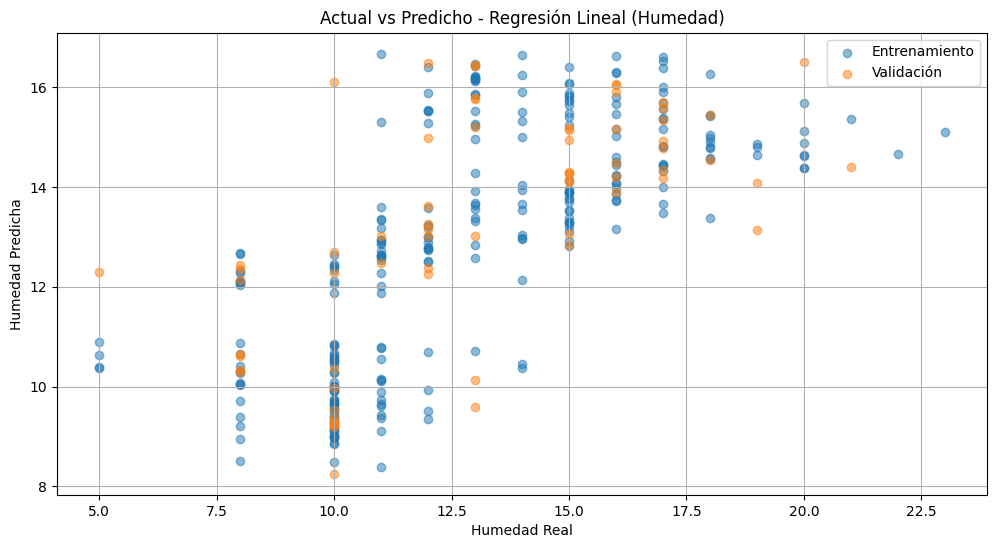

In [51]:
# Actual vs Predicho (Entrenamiento y Validación) - Regresión Lineal (Humedad)
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Entrenamiento')
plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validación')
plt.xlabel('Humedad Real')
plt.ylabel('Humedad Predicha')
plt.title('Actual vs Predicho - Regresión Lineal (Humedad)')
plt.legend()
plt.grid(True)
plt.show()

ESTADÍSTICAS DETALLADAS
R² en prueba: 0.4131
Error absoluto promedio: 2.0526%
Error máximo: 7.3054%
Error mínimo: 0.0278%
Desviación estándar del error: 1.6616%


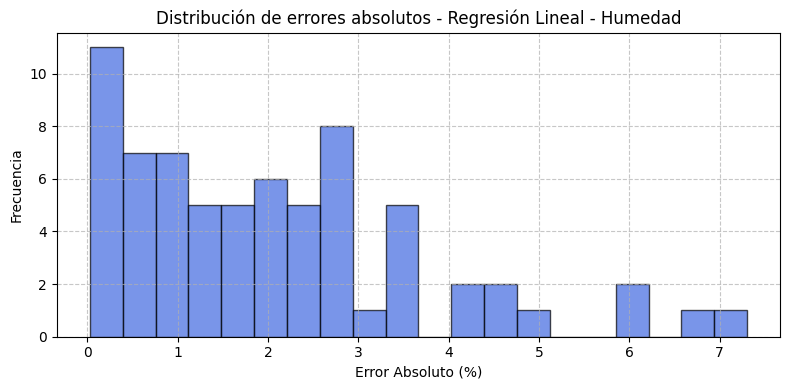

In [69]:
# Estadísticas detalladas y resumen de errores para Humedad
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

print('ESTADÍSTICAS DETALLADAS')
print(f'R² en prueba: {r2_score(y_val, y_val_pred):.4f}')
print(f'Error absoluto promedio: {err_mean:.4f}%')
print(f'Error máximo: {err_max:.4f}%')
print(f'Error mínimo: {err_min:.4f}%')
print(f'Desviación estándar del error: {err_std:.4f}%')

# Histograma de la distribución de errores absolutos (Humedad)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='royalblue', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto (%)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión Lineal - Humedad')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

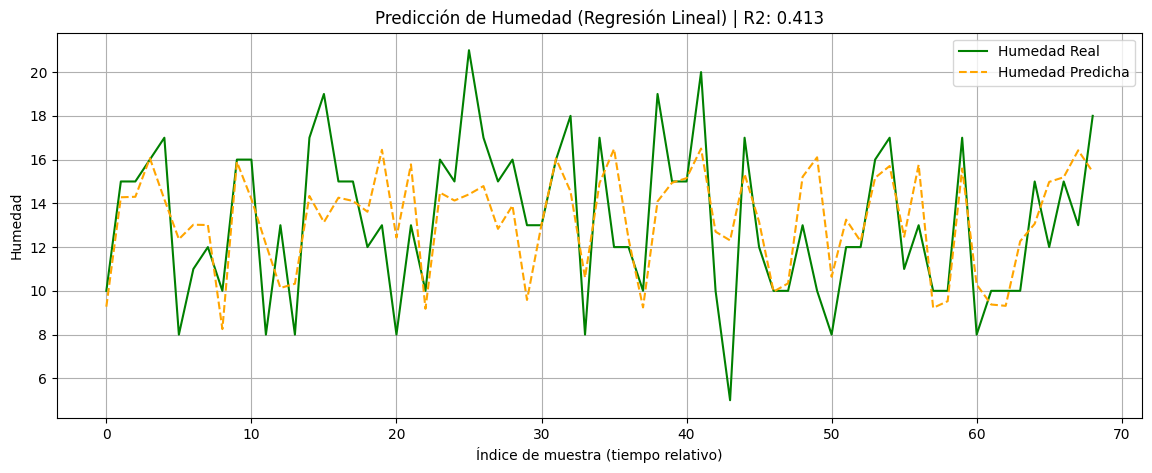

In [68]:
# Serie temporal: Humedad real vs predicha (validación)
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, label='Humedad Real', color='green')
plt.plot(np.arange(len(y_val_pred)), y_val_pred, label='Humedad Predicha', color='orange', linestyle='--')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Humedad')
plt.title(f'Predicción de Humedad (Regresión Lineal) | R2: {r2_score(y_val, y_val_pred):.3f}')
plt.legend()
plt.grid(True)
plt.show()

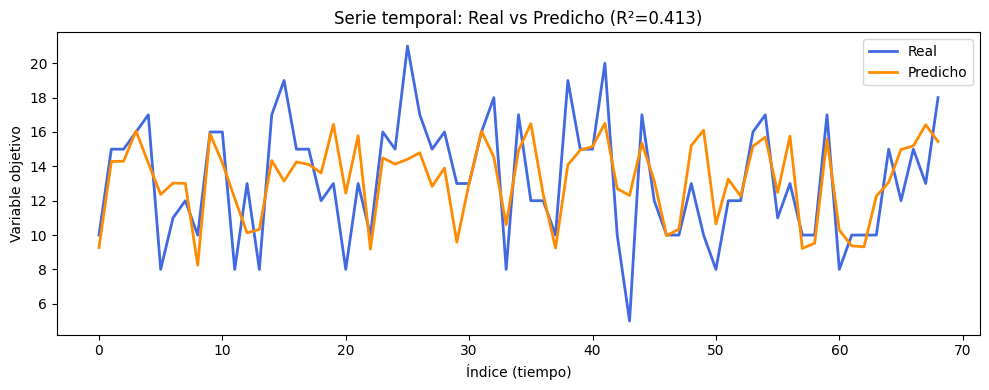

In [55]:
# Serie temporal: valores reales vs predichos
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(10,4))
plt.plot(range(len(y_val)), y_val, label='Real', color='royalblue', linewidth=2)
plt.plot(range(len(y_val_pred)), y_val_pred, label='Predicho', color='darkorange', linewidth=2)
plt.xlabel('Índice (tiempo)')
plt.ylabel('Variable objetivo')
plt.title(f'Serie temporal: Real vs Predicho (R²={r2_score(y_val, y_val_pred):.3f})')
plt.legend()
plt.tight_layout()
plt.show()

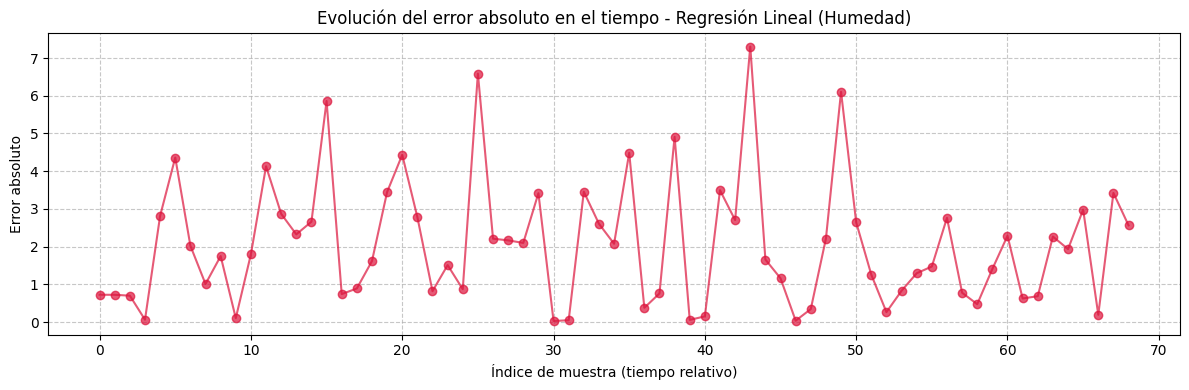

In [71]:
# Evolución del error absoluto en el tiempo - Humedad
plt.figure(figsize=(12,4))
plt.plot(error_abs, marker='o', linestyle='-', color='crimson', alpha=0.7)
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error absoluto')
plt.title('Evolución del error absoluto en el tiempo - Regresión Lineal (Humedad)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

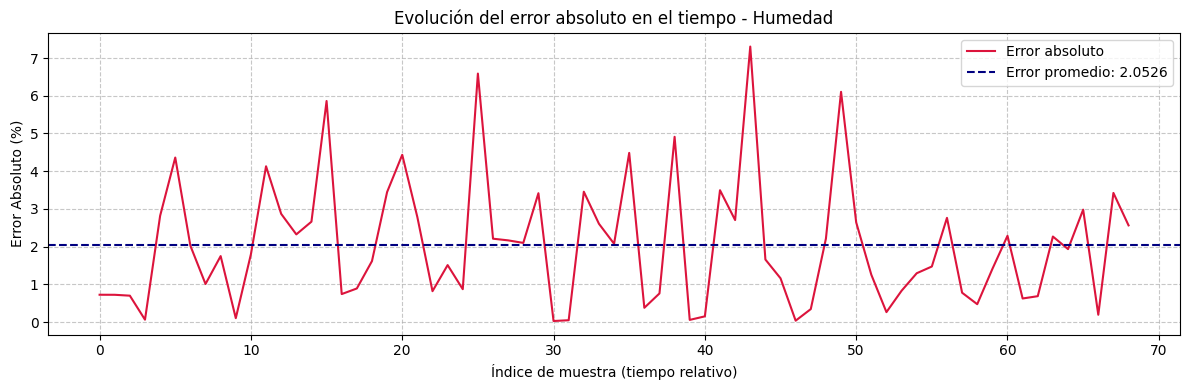

In [73]:
# Gráfica de errores absolutos en el tiempo (Humedad)
plt.figure(figsize=(12,4))
plt.plot(error_abs, color='crimson', label='Error absoluto')
plt.axhline(np.mean(error_abs), color='navy', linestyle='--', label=f'Error promedio: {np.mean(error_abs):.4f}')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error Absoluto (%)')
plt.title('Evolución del error absoluto en el tiempo - Humedad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

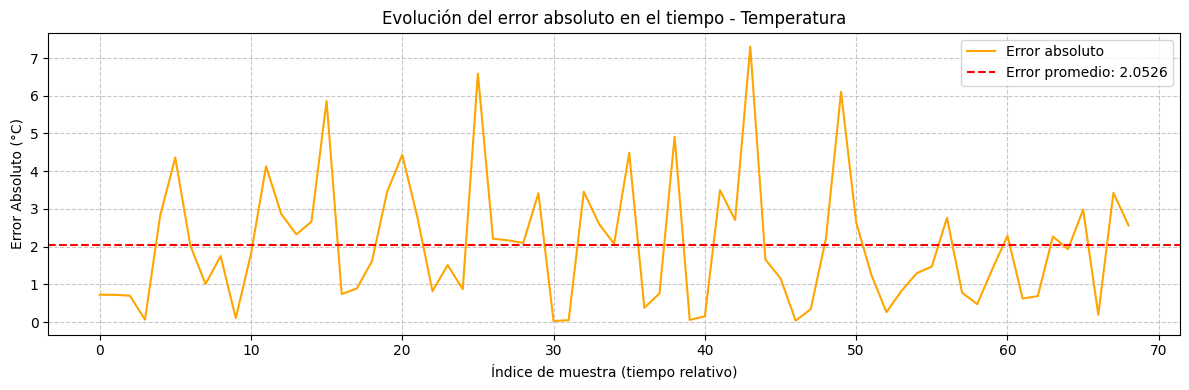

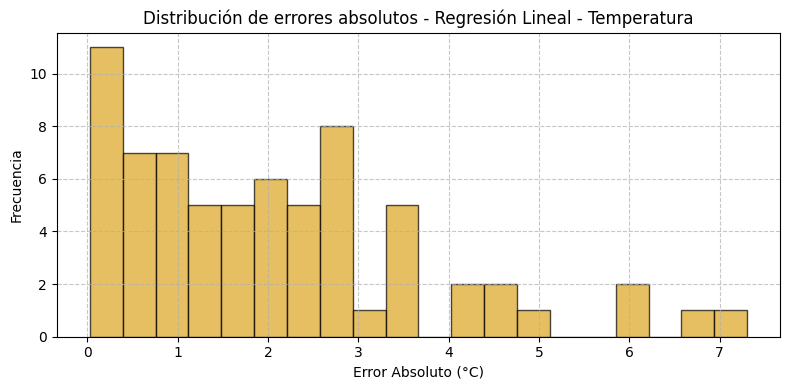

Métrica,Regresión Lineal
MSE (Test),6.9739
R² (Test),0.4131
Error Promedio (°C),2.0526
Error Máximo (°C),7.3054
Error Mínimo (°C),0.0278
Desviación Estándar del Error,1.6616


In [74]:
# Gráfica de errores absolutos en el tiempo (Temperatura)
error_abs = np.abs(y_val.ravel() - y_val_pred.ravel())
plt.figure(figsize=(12,4))
plt.plot(error_abs, color='orange', label='Error absoluto')
plt.axhline(np.mean(error_abs), color='red', linestyle='--', label=f'Error promedio: {np.mean(error_abs):.4f}')
plt.xlabel('Índice de muestra (tiempo relativo)')
plt.ylabel('Error Absoluto (°C)')
plt.title('Evolución del error absoluto en el tiempo - Temperatura')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de la distribución de errores absolutos (Temperatura)
plt.figure(figsize=(8,4))
plt.hist(error_abs, bins=20, color='goldenrod', edgecolor='black', alpha=0.7)
plt.xlabel('Error Absoluto (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de errores absolutos - Regresión Lineal - Temperatura')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Tabla resumen de métricas para Temperatura
from IPython.display import display, HTML
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
err_mean = np.mean(error_abs)
err_max = np.max(error_abs)
err_min = np.min(error_abs)
err_std = np.std(error_abs)

html_table = f'''
<table style="border-collapse:collapse; width:50%">
<tr><th style="border:1px solid black; padding:4px">Métrica</th><th style="border:1px solid black; padding:4px">Regresión Lineal</th></tr>
<tr><td style="border:1px solid black; padding:4px">MSE (Test)</td><td style="border:1px solid black; padding:4px">{mse:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">R² (Test)</td><td style="border:1px solid black; padding:4px">{r2:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Promedio (°C)</td><td style="border:1px solid black; padding:4px">{err_mean:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Máximo (°C)</td><td style="border:1px solid black; padding:4px">{err_max:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Error Mínimo (°C)</td><td style="border:1px solid black; padding:4px">{err_min:.4f}</td></tr>
<tr><td style="border:1px solid black; padding:4px">Desviación Estándar del Error</td><td style="border:1px solid black; padding:4px">{err_std:.4f}</td></tr>
</table>'''
display(HTML(html_table))